In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.linalg

from src.simpleEDMD import *

%load_ext autoreload
%autoreload 2
%matplotlib inline

np.set_printoptions(suppress=True,precision=4)

# Reconstruct FIG2

In [ ]:
def analytical_koopman_eigenfunction(x,y,i,j):
    return np.power((x-y)/np.sqrt(2),i)*np.power(y,j)

def analytical_koopman_eigenvalue(i,j):
    return np.power(0.9,i)*np.power(0.8,j)


In [ ]:
x1 = np.arange(-5, 5.1, 0.1)
x2 = np.arange(-5, 5.1, 0.1)
xx1, xx2 = np.meshgrid(x1, x2)

In [ ]:
fig, axs = plt.subplots(2, 4,figsize=(36,15))
ij = [[1,0],[2,0],[0,1],[3,0],[1,1],[4,0],[2,1],[0,2]] #normalized to [-1,1]
for index, power in enumerate(ij):
    
    i = power[0]
    j = power[1]

    z = analytical_koopman_eigenfunction(xx1,xx2,i,j)
   
    temp = z.flatten()
    inf_norm = np.linalg.norm(temp, np.inf)
    normalized_z = np.array( [v/inf_norm for v in z])

    if index < 4:
        ax = axs[0,index]
    else:
        ax = axs[1,index-4]
    
    c = ax.pcolor(x1, x2, normalized_z, cmap='jet', vmin=-1, vmax=1)
    ax.set_title('$\mu = (0.9)^{}(0.8)^{}$'.format(i,j))
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    fig.colorbar(c, ax=ax)


# Data generation
for example4.1.1

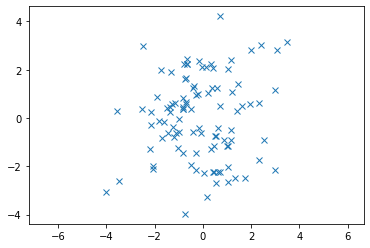

In [2]:
#generate X as 100 normally distributed initial conditions 2x100
mean = [0, 0]
cov = [[3, 0], [0, 3]]
x1, x2 = np.random.multivariate_normal(mean, cov, 100).T
plt.plot(x1, x2, 'x')
plt.axis('equal')
plt.show()

X = []
for i in range(0,100):
    X.append([x1[i],x2[i]])
X = np.array(X)

In [3]:
#generate true Y by multiplying J
J = np.array([[0.9, -0.1],[0, 0.8]])
Y = []
for i in range(0,100):
    xi = X[i]
    yi = J@xi
    Y.append(yi)

Y = np.array(Y)

# EDMD for linear example

In [4]:
linearEDMD = simpleEDMD(X,Y)

In [5]:
linearEDMD.compute_koopman_operator()

In [6]:
K = linearEDMD.koopman_matrix
K

array([[   1.423 ,    0.1527,    0.3136,    1.8876,   -0.3213,    0.1269,
           0.4676,    0.4051,    2.7042,    3.2026,    0.5294,    1.1032,
           2.2065,    6.373 ,   20.0693,    1.2425,    1.6292,    4.1343,
          17.9681,   31.5088,   -3.6599,    6.2634,   13.5686,   39.4824,
         126.5851],
       [   0.0306,    0.9945,   -0.3296,   -1.5331,   -3.331 ,   -0.2743,
          -0.7293,   -0.0132,   -2.7051,   -0.8361,   -0.4102,   -2.8481,
          -3.3846,  -18.0188,  -27.6191,   -3.4236,   -6.993 ,   -4.0348,
         -29.9633,  -27.3309,   -7.8659,  -23.0246,  -16.1807,  -89.3096,
        -136.4254],
       [  -0.1728,   -0.4247,    0.582 ,   -3.6105,   -5.0949,   -0.1143,
          -1.807 ,    0.1619,  -11.5115,    0.9625,   -0.3774,   -4.5271,
          -5.2725,  -24.18  ,  -66.907 ,   -1.6425,  -13.2534,   -1.4814,
         -89.4278,  -16.8726,   -2.0109,  -30.2826,  -32.3026, -143.9111,
        -405.5655],
       [  -0.04  ,   -0.0423,   -0.2536,    1.4165, 

In [7]:
Mu = linearEDMD.koopman_eigenvalues
Mu # correctly responding to eigenvalues in Fig.3

array([1.    +0.j    , 0.9   +0.j    , 0.81  +0.j    , 0.8   +0.j    ,
       0.729 +0.j    , 0.72  +0.j    , 0.6561+0.j    , 0.648 +0.j    ,
       0.64  +0.j    , 0.5832+0.j    , 0.576 +0.j    , 0.5184+0.j    ,
       0.5162+0.0864j, 0.5162-0.0864j, 0.512 +0.j    , 0.4899+0.j    ,
       0.4608+0.j    , 0.4096+0.j    , 0.3754+0.j    , 0.2943+0.109j ,
       0.2943-0.109j , 0.2932+0.0804j, 0.2932-0.0804j, 0.2281+0.j    ,
       0.1742+0.j    ])

In [8]:
Xi = linearEDMD.right_eigenvectors
Xi.shape

(25, 25)

In [9]:
Wstar = linearEDMD.left_eigenvectors.conjugate().T
Wstar

array([[ 0.0034-0.j    ,  0.0007-0.j    ,  0.0072-0.j    ,
        -0.0001-0.j    ,  0.0004-0.j    , -0.0062-0.j    ,
         0.0035-0.j    ,  0.0008-0.j    ,  0.0011-0.j    ,
        -0.0042-0.j    , -0.0002-0.j    , -0.0042-0.j    ,
         0.0001-0.0004j,  0.0001+0.0004j,  0.    -0.j    ,
        -0.0018-0.j    , -0.0036-0.j    ,  0.0008-0.j    ,
        -0.0002-0.j    ,  0.0001+0.0001j,  0.0001-0.0001j,
         0.0002+0.0001j,  0.0002-0.0001j,  0.    -0.j    ,
         0.0001-0.j    ],
       [-0.0004-0.j    , -0.0096-0.j    , -0.0001-0.j    ,
        -0.0006-0.j    ,  0.0093-0.j    , -0.0013-0.j    ,
         0.0003-0.j    ,  0.0074-0.j    ,  0.0002-0.j    ,
        -0.0006-0.j    , -0.0026-0.j    , -0.0004-0.j    ,
        -0.0004-0.0002j, -0.0004+0.0002j,  0.0009-0.j    ,
        -0.0007-0.j    , -0.0007-0.j    ,  0.0002-0.j    ,
         0.0004-0.j    ,  0.0003+0.j    ,  0.0003-0.j    ,
         0.0001+0.0002j,  0.0001-0.0002j, -0.0006-0.j    ,
        -0.    -0.j    ],
    

In [10]:
Wstar[:,1]@Xi[:,1]

(0.001217540156105647+0j)

## koopman_eigenfunction draft (WRONG)

In [11]:
ex1 = np.arange(-5, 5.1, 0.1)
ex2 = np.arange(-5, 5.1, 0.1)
xx1, xx2 = np.meshgrid(x1, x2)

In [12]:
#plot for 2nd eigenvalue = 0.9 
#corresponding to analytical solution i = 2, j = 0
mu = np.round(Mu[1].real,4)
print(mu)
ez = np.zeros((len(ex1),len(ex1)))

for i,x1n in enumerate(ex1):
    for j,x2n in enumerate(ex2):
       
        Psi = linearEDMD.dictionary_Hermite_poly([x1n,x2n])
  
        ez[i][j] = Psi@Xi[1].real
     

0.9


-122807.36523089743 428.4871530936397


/Users/longtaoliu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  if sys.path[0] == '':


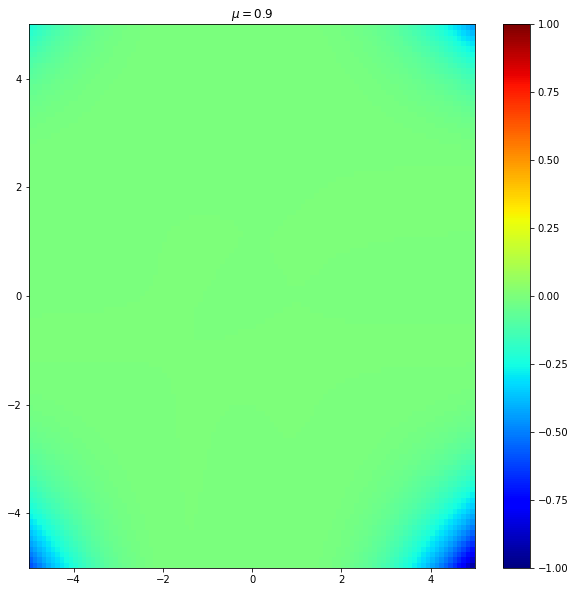

In [16]:
ez_min,ez_max = ez.min(),ez.max()
print(ez_min,ez_max)
#normalized_ez = 2*(ez-ez_min)/(ez_max-ez_min)-1

temp = ez.flatten()
inf_norm = np.linalg.norm(temp, np.inf)
normalized_ez = np.array( [v/inf_norm for v in ez])

fig, ax = plt.subplots(1, 1,figsize=(10,10))

#c = ax.pcolor(ex1, ex2, ez, cmap='jet', vmin=ez_min, vmax=ez_max)
c = ax.pcolor(ex1, ex2, normalized_ez, cmap='jet', vmin=-1, vmax=1)
ax.set_title('$\mu = {}$'.format(mu))
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
fig.colorbar(c, ax=ax)